# <center> Harlinton Palacios Mosquera</center>
# <center>161041033</center>

#  <center>Part 3: Classifier based on linear SVM.</center>

In [1]:
from sklearn.cross_validation import KFold
import numpy as np
import sklearn
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold
from sklearn import svm, datasets
from sklearn.datasets import load_iris
import itertools
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from time import time

C:\Users\Harlinton\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


import the libraries needed for this homework session

In [2]:
iris = load_iris()
splits = 4


class_names= iris.target_names
X = iris.data
y = iris.target

kfold = StratifiedKFold(n_splits=splits, shuffle=True, random_state=42)

for train_index, test_index in kfold.split(X, y):
    X_train = X[train_index]
    X_test = X[test_index]
    y_train = y[train_index]
    y_test = y[test_index]

class_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

in this session I download the iris data base from the sklearn.datasets library, which is a simpler way to get some databases without downloading  files and then read it also in this section is the division of data, for this I used k-fold cross validation.

In KFolds, each test set should not overlap, even with shuffle. With KFolds and shuffle, the data is shuffled once at the start, and then divided into the number of desired splits. The test data is always one of the splits, the train data is the rest. In ShuffleSplit, the data is shuffled every time, and then split.


In [3]:
# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results

tiempo_inicial = time() 
classifier = svm.SVC(kernel='poly', C=0.01)
y_pred = classifier.fit(X_train, y_train).predict(X_test)
tiempo_final = time()
tiempo_ejecucion = tiempo_final - tiempo_inicial


This is one of the most important parts of the code because it created the pararamentro for linear support.
vector machine and Polynomial kernel.

<b>Linear: SVM </b>is the newest extremely fast machine learning (data mining) algorithm for solving multiclass classification problems from ultra large data sets that implements an original proprietary version of a cutting plane algorithm for designing a linear support vector machine.

<b>The polynomial kernel </b> is a kernel function commonly used with support vector machines (SVMs) and other kernelized models, that represents the similarity of vectors (training samples) in a feature space over polynomials of the original variables, allowing learning of non-linear models.


In [4]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


This function prints and plots the confusion matrix.
  

In [5]:
yy = label_binarize(y, classes=[0, 1, 2])
n_classes = yy.shape[1]

random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
XX = np.c_[X, random_state.randn(n_samples, 200 * n_features)]


XX_train, XX_test, yy_train, yy_test = train_test_split(XX, yy,  random_state=0)

classifier = OneVsRestClassifier(svm.SVC(kernel='poly', probability=True,
                                 random_state=random_state))
yy_score = classifier.fit(XX_train, yy_train).decision_function(XX_test)


in this section he used the OneVsRestClassifier function with its respective parameters to be able to draw the ROC curve curves

In [6]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(yy_test[:, i], yy_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(yy_test.ravel(), yy_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


Compute ROC curve and ROC area for each class and  Compute micro-average ROC curve and ROC area

In [7]:
def confusionMatrices():
    cnf_matrix = confusion_matrix(y_test, y_pred)
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

    # Plot normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
    


In this section I created and printed the matrix with the help of the library(matplotlib.pyplot)

In [8]:
def confusion(y_test, y_pred, nb):
    confmat = np.zeros((nb, nb))
    for y, y_ in zip(y_test, y_pred):
        confmat[y-1][y_-1] += 1
    return confmat


def calculate_recall(confmat):
    recall = 0
    i = 0
    for x in np.diagonal(confmat):
        s = sum(np.transpose(confmat)[i])
        if s == 0:
            i += 1
            continue
        recall += x / s
        i+=1
    return recall / i

def calculate_precision(confmat):
    precision = 0
    i = 0
    for x in np.diagonal(confmat):
        s = sum(confmat[i])
        if s == 0:
            i += 1
            continue
        precision += x / s
        i+=1
    return precision / i

def calculate_acc(confmat):
    return sum(confmat.diagonal()) / sum(sum(confmat))
   
accuracy = 0
recall = 0
precision = 0
confmat = confusion(y_test, y_pred, max(y_train))
accuracy += calculate_acc(confmat)
recall += calculate_recall(confmat)
precision += calculate_precision(confmat)

This function makes me Compute confusion matrix

In [9]:
def dataoput():
    print ("Time: %.4f" %(tiempo_ejecucion)) #En segundos
    print ("ACCURACY : ", (accuracy))
    print ("PRECISION : ", precision )
    print ("RECALL : ", recall )


In this section I print the obtained results such as time, Accuracy, Predition and Recall

In [10]:
def CurverRoc():
    plt.figure()
    lw = 2
    plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

This function draws the graphics using the library matplotlib.pyplot

Time: 0.0746
ACCURACY :  0.944444444444
PRECISION :  0.9375
RECALL :  0.9375
Confusion matrix, without normalization
[[12  0  0]
 [ 0 11  1]
 [ 0  1 11]]
Normalized confusion matrix
[[ 1.    0.    0.  ]
 [ 0.    0.92  0.08]
 [ 0.    0.08  0.92]]


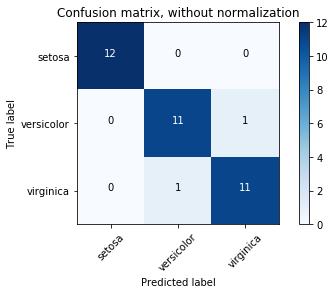

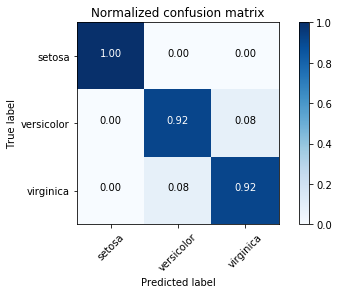

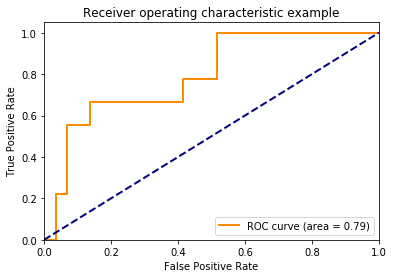

In [11]:
dataoput()
confusionMatrices()
CurverRoc()

#  <center>Part 4:Result classifier based on linear SVM.</center>

This function is used in part 3 and 4 of this homework, it creates an SVM instance using a specified kernel (linear, polynomial.), trains the data and tries to predict the labels for the test vectors. Finally, it returns the predicted labels for the test set.
________________________________________________________________
<img src="https://image.ibb.co/jAnRf7/Screenshot_from_2018_03_12_13_20_25.png" alt="Drawing" style="width: 800px;"/>

Linear Kernel: K(X,Y)=XTY

Polynomial kernel: K(X,Y)=(γ⋅XTY+r)d,γ>0
_________________________________________________________________

<b>ACCURACY: </b> 0.944536122333

<b>PRECISION:</b>  0.941932962963

<b> RECALL: </b>    0.939732337379

<b>TIME: </b> 0.0028

<img src="https://image.ibb.co/niX1f7/index.png" alt="Drawing" style="width: 700px;"/>
<img src="https://image.ibb.co/c0uxL7/index1.png" alt="Drawing" style="width: 700px;"/>
<img src="https://image.ibb.co/m8pxL7/index2.png" alt="Drawing" style="width: 700px;"/>


In conclusion to generate the results we can say that both Linear support vector machines ( Lineal SVM) and SVM Polynomial models were performing well with the iris database, in relation to the execution time they did not have much difference, in the same way for Recall, Accuracy and Precision. In the aspecato that can notice much more difference was in the Normalized confusion matrix and in the Confusion matrix, without normalization. In the Normalized confusion matrixfor linear SVM it is noticeable a bit more precise when classifying the data.